# Simulating Shubnikov-de Haas oscillations at low field for $\mu$ , $m^*$ and $\alpha$

In [36]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import peakutils
from scipy.interpolate import interp1d,splev,splrep
from scipy.optimize import brentq,curve_fit
from scipy.special import erf

#%matplotlib widget

In [22]:
def straightline(x,m,c):
    y = m*x+c
    return y


### this simulates SDH oscillations according to different models for the DOS(Density of states) in a magnetic field around the Fermi level.
(the electron scattering rate and the conductivity oscillate along the 1/B periodly)

### Quantum and transport scattering  rates

The quantum scattering rate considers the elastic sacttering between any two states:
$$ \tau_q^{-1} = \frac{m^*}{\pi\hbar^3} \int_0^{\pi} \frac{|V(q)|^2}{\varepsilon_q^2} \mathrm{d}\theta
$$
$$ = \frac{m^*}{\pi \hbar^3} \frac{1}{k^2_F} \int_0^{2k_F} \frac{2 k_F^2}{\sqrt{4k_F^2 - q^2}} \frac{|V(q)|^2}{\varepsilon_q^2} \mathrm{d}q$$

The transport scattering rate considers that large angle scattering has a stronger effect than small angle scattering:
$$\tau^{-1} = \frac{m^*}{\pi \hbar^3} \int_0^\pi (1-\cos\theta) \frac{|V(q)|^2}{\varepsilon_q^2} \mathrm{d}\theta $$
$$ = \frac{m^*}{\pi \hbar^3} \frac{1}{k^2_F} \int_0^{2k_F} \frac{q^2}{\sqrt{4k_F^2 - q^2}} \frac{|V(q)|^2}{\varepsilon_q^2} \mathrm{d}q$$

The change of variables uses $q = 2k_F \sin(\theta/2)$ so ${2\sqrt{k^2_F - (q/2)^2}} = 2k_F\cos(\theta/2)$, $\frac{dq}{d\theta} = k_F \cos(\theta/2)$, etc., and $1-\cos(\theta) = \frac{q^2}{2 k^2_F}$.

[R. J. P. Lander, M. J. Kearney, A. I. Horrell, E. H. C. Parker, P. J. Phillips, and T. E. Whall. On the low-temperature mobility of holes in gated oxide Si/SiGe heterostructures. Semicond. Sci. Technol. 12 (9) 1064--1071 (1997)](http://dx.doi.org/10.1088/0268-1242/12/9/002)

[M. J. Kearney, A. I. Horrell, and V. M. Dwyer. The transport-time to state-lifetime ratio in semiconductor quantum-well alloys: a multiple scattering analysis. Semicond. Sci. Technol. 15 (1) 24--31 (2000)](http://www.iop.org/EJ/abstract/0268-1242/15/1/304)

$\tau_q$ is usually shorter than $\tau$ in the case of charged impurity scattering, and especially so in the case of remote charged impurities, so $\tau_q$ was identified as the lifetime of the Landau levels in high mobility samples in which the use of $\tau$ would have given levels which were much too sharp.



## Lorenztian Landau Levels

If $g_0 = m^* / \pi\hbar^2$ is the 2d zero-field density of states, low-field Shubnikov-de Haas oscillations are usually understood in terms of the oscillatory components of the density of states:

$$\frac{\Delta g(E)}{g_0} = 2 \sum_{s=1}^{\infty} \exp\frac{-\pi s}{\omega_c \tau_q} \cos \left[ \frac{2\pi s E}{\hbar \omega_c} - s\pi \right] \frac{s\zeta}{\sinh (s\zeta)}$$
which describes a series of spin-degenerate Landau levels (LLs) broadened by the quantum scattering lifetime $\tau_q$, thermally broadened by the term which includes
$$\zeta = \frac{2\pi^2 k_B T}{\hbar \omega_c} = \frac{2\pi^2 m^2 k_B T}{e \hbar B}$$

[R. B. Dingle. Some magnetic properties of metals II. The influence of collisions on the magnetic behaviour of large systems. Proc. Royal Soc. A 211 (1107) 517--525 (1952)](https://doi.org/10.1098/rspa.1952.0056)

[A. H. Kahn and H. P. R. Frederikse. Oscillatory Behavior of Magnetic Susceptibility and Electronic Conductivity. Solid State Phys. 9 257--291 (1959)](https://doi.org/10.1016/S0081-1947(08)60567-6)

[A. Isihara and L. Smrčka. Density and magnetic field dependences of the conductivity of two-dimensional electron systems. J. Phys. C. Solid State Phys. 19 (34) 6777--6789 (1986)](http://dx.doi.org/10.1088/0022-3719/19/34/015)

[P. T. Coleridge, R. Stoner, and R. Fletcher. Low-field transport coefficients in GaAs/Ga$_{1-x}$Al$_x$As heterostructures. Phys. Rev. B 39 (2) 1120--1124 (1989)](http://link.aps.org/abstract/PRB/v39/p1120)

This formulation considers Lorentzian LLs of width $\Gamma_L = \hbar/2\tau_q$
$$\exp\frac{-2 \pi s \Gamma_L}{\hbar \omega_c} = \exp\frac{-\pi s}{\omega_c \tau_q} = \exp\frac{-\pi s \alpha}{\mu B}$$
in which $\alpha = \tau/\tau_q$, the ratio between transport and quantum scattering lifetimes. The term "quantum mobility" $\mu_q = e\tau_q / m^*$ is also sometimes used. $\alpha$ is usually found from the slope of a so-called Dingle plot, since the amplitudes of the low-field Shubnikov--de~Haas oscillations $\Delta \rho$ should follow:
$$\log\left(\frac{\Delta \rho}{\rho_0} \frac{\sinh(\zeta)}{\zeta}\right) = \log(4) - \frac{\pi \alpha}{\mu B}$$
as long as the oscillations are small such that the following inversion of the conductivity tensor is valid and only the $s=1$ component need be considered:
$$\rho_{xx}(B) = \rho_0 \left[1 + 2\frac{\Delta g(E_F)}{g_0} \right]$$

[P. T. Coleridge. Small-angle scattering in two-dimensional electron gases. Phys. Rev. B 44 (8) 3793--3801 (1991)](http://link.aps.org/abstract/PRB/v44/p3793)

To use this model, set `Lorentzian = True` in the next code box.

## Gaussian Landau Levels (fixed width)

Gaussian LLs for fixed width $\Gamma_G = 2\sqrt{2\ln{2}}\,\hbar/2\tau_q$ can be considered by replacing the exponential factor with
$$\exp\left(-\frac{\pi s \Gamma_G}{\hbar \omega_c}\right)^2$$
This gives Dingle plots with quadratic rather than linear behavior:
$$\log\left(\frac{\Delta \rho}{\rho_0} \frac{\sinh(\chi)}{\chi}\right) = \log(4) - 2\log(2)\left(\frac{\pi \alpha}{\mu B}\right)^2$$

[B. A. Piot, D. K. Maude, M. Henini, Z. R. Wasilewski, K. J. Friedland, R. Hey, K. H. Ploog, A. I. Toropov, R. Airey, and G. Hill. Quantum Hall ferromagnet at high filling factors: A magnetic-field-induced Stoner transition. Phys. Rev. B 72 (24) 245325 (2005)](http://link.aps.org/abstract/PRB/v72/e245325)

If `Lorentzian = False` then set `Piot = True` in the next code box to see this behaviour.

## Gaussian Landau Levels ($\sqrt{B}$ width)

Gaussian LLs with a width proportional to $\sqrt{B}$ are instead given by the same exponential factor but with the width given by
$$\Gamma^2_G = \frac{1}{2 \pi^2 R_L} \int_0^{\infty} S(q) \mathrm{d}q$$
The Lamor radius $R_L = l \sqrt{2E/\hbar \omega_c}$ with the magnetic length $l = \sqrt{\hbar / eB}$. The integral is essentially that which defines $\tau_q$ for a screened potential, except that it is carried out linearly in $\mathrm{d}q$ rather than around the circle corresponding to $q = 2k_F \sin(\theta/2)$.

At $E = E_F = \hbar^2 k^2_F / (2 m^*)$,
$$R_L(E_F) = \sqrt{\frac{\hbar}{eB} \frac{2E_F}{\hbar \omega_c}} = \frac{\hbar k_F}{e B}$$
So we make the replacement
$$\int_0^{\infty} S(q) dq =  k_F \frac{\pi \hbar^2}{m^*}\frac{\hbar}{\tau_q}$$
in the equation for $\Gamma^2_G$ to obtain
$$\Gamma^2_G = \frac{k_F}{2 \pi} \frac{e B}{\sqrt{2 E m^*}} \frac{\pi \hbar^2}{m^*} \frac{\hbar}{\tau_q}$$
This makes explicit the $\sqrt{B}$ and $E^{-\frac{1}{4}}$ behavior, and gives linear Dingle plots when used in the DOS (considering $s=1$ and $E = E_F$):
$$\exp \frac{-\pi^2 \Gamma^2_G}{\hbar^2 \omega^2_c} = \exp \frac{-\pi^2 }{2 \omega_c \tau_q} = \exp \frac{-\pi^2 \alpha}{2 \mu B}$$
$$\log\left(\frac{\Delta \rho}{\rho_0} \frac{\sinh(\chi)}{\chi}\right) = \log(4) - \frac{\pi^2 \alpha}{2 \mu B}$$

If `Lorentzian = False` then set `Raikh = True` in the next code box to see this behaviour.

[M. E. Raikh and T. V. Shahbazyan. High Landau levels in a smooth random potential for two-dimensional electrons. Phys. Rev. B 47 (3) 1522--1531 (1993)](http://link.aps.org/abstract/PRB/v47/p1522)



## SCBA

Note that we are not considering that also the degree of screening may change as the DOS at $E_F$ varies. This (the "Self-consistent Born approximation") may apparently lead to elliptical LLs.

[Tsuneya Ando, Yukio Matsumoto, and Yasutada Uemura. Theory of Hall Effect in a Two-Dimensional Electron System. J. Phys. Soc. Jpn. 39 (2) 279--288 (1975)](https://journals.jps.jp/doi/abs/10.1143/JPSJ.39.279)

## Fermi level pinning

The simplest and fastest results are obtained with a fixed Fermi level. To let the Fermi level move to conserve the total carrier density, set `EFmoves = True` in the next code box.

## Inversion of the conductivity tensor

In the lecture notes, we only saw how the conductivity tensor elements were modified by the field-dependent DOS, and then saw the approximate forms for the modification of the resistivity tensor elements. Some of the steps in the derivation are also given in the paper by Coleridge, which also cites the Raikh paper for Gaussian LLs with $\sqrt{B}$ width.

[P. T. Coleridge, A. S. Sachrajda, H. Lafontaine, and Y. Feng. Magnetotransport coefficients in a two-dimensional SiGe hole gas. Phys. Rev. B 54 (20) 14518--14523 (1996)](http://link.aps.org/abstract/PRB/v54/p14518)


In [76]:
Lorentzian = True
Piot = False
Raikh = False

EFmoves = False


hbar = 1.054571817e-34 # Js
me = 9.1093837015e-31 # kg
q = 1.602176634e-19 # C
kB = 1.380649e-23 # J/K
muB = hbar/(2*me) # Bohr magneton in eV

# mu = 100000 # cm2/Vs
# ns = 9.0e11 # cm-2

# VG = -0.6V, June 2021
ns = 1e-4*6.18e15 # m-2
mu = 1e4*6.35 # m2/Vs

meff = 0.080*(1+0.056*(ns/1e11))*me
# meff = 0.15*me # effective mass
alpha = 6 # Dingle ratio
geff = 0.0 # effective g factor for Zeeman spin-splitting
betak3 = 0.0 # 1e-3 # Rashba splitting in eV

savedata = True

mum = mu*1e-4
nsm = ns*1e4

sigma0 = nsm*q*mum
rho0 = 1/sigma0

# print(1e-4/(q*ns))

tau = mum*meff/q # s
tauq = tau/alpha # s

kF = np.sqrt(2*np.pi*nsm) # m-1
EFk = ((hbar*kF)**2)/(2*meff*q) # eV

T = 1.6 # K

g0 = q*meff/(np.pi*hbar**2) # cm-2 eV-1

if Lorentzian is True:
    Gaussian = False
    
else:
    Gaussian = True
    if Piot is False:
        Raikh = True

def wcB(B,meff):
    return q*B/meff # s-1

def chiBT(B,T,meff):
    return 2*np.pi**2*kB*T/(hbar*wcB(B,meff)) # dimensionless

def DgG(E,B,T,tau,tauq,geff,meff,s):
    wc = wcB(B,meff) # s-1
    chi = chiBT(B,T,meff)
    if Lorentzian is True: 
        toreturn=np.exp(-np.pi*s/(wc*tauq))*np.cos(2*np.pi*s*(E+0.5*geff*muB*B)/(hbar*wc/q)+s*np.pi)*s*chi/(np.sinh(s*chi)) # Lorentzian
    if Gaussian is True:
        if Piot is True:
            GammaG = 2.354*hbar/(2*tauq) # piot:2005

        if Raikh is True:    
            maglen = np.sqrt(hbar/(q*B))
            RL = maglen*np.sqrt(2*q*E/(hbar*wc)) # Energy is already in eV, Fermi energy is EFk, kF is also available
            GammaGsquared = kF/(2*np.pi**2*RL)*np.pi*hbar**3/(meff*tauq) # multiply by kF?
            GammaG = np.sqrt(GammaGsquared)
            
        toreturn=np.exp(-((s*np.pi*GammaG)/(hbar*wc))**2)*np.cos(2*np.pi*s*(E+0.5*geff*muB*B)/(hbar*wc/q)+s*np.pi)*s*chi/(np.sinh(s*chi)) # Gaussian (piot:2005)

    return toreturn

def DgIS(E,B,T,tau,tauq,geff,meff):
    # wc = wcB(B,meff) # s-1
    # chi = chiBT(B,T,meff)
    DgE = 0.0
    for s in range(1,Ns):
        DgEsp = DgG(E,B,T,tau,tauq,geff,meff,s)
        DgEsn = DgG(E,B,T,tau,tauq,-geff,meff,s)
        DgE = DgE+DgEsp+DgEsn

    return DgE

def oneplusDgIS(E,B,T,tau,tauq,geff,meff):
    return 1+DgIS(E,B,T,tau,tauq,geff,meff)

def DgEtoEF(EF,B,T,tau,tauq,geff,meff):
    # integrates 1+Dg up to the given EF
    EFnum = 2000
    EFindex = np.arange(EFnum+1)
    EtoEF = (EF*EFindex)/EFnum
    DgInt=oneplusDgIS(EtoEF,B,T,tau,tauq,geff,meff)
    return np.trapezoid(DgInt,EtoEF)

def ExEf(Ex,EF,B,T,tau,tauq,geff,meff):
    # compare the integral 0 to Ex with EF
    return EF-DgEtoEF(Ex,B,T,tau,tauq,geff,meff)

def dNdB(EF,B,T,tau,tauq,geff,meff):
    # calculate dN/dB for sigmaXY
    dB = 1.0e-4
    Np = g0*DgEtoEF(EF,B+dB,T,tau,tauq,geff,meff)
    Nm = g0*DgEtoEF(EF,B-dB,T,tau,tauq,geff,meff)
    diff = -(Np-Nm)/(2*dB)
    return diff


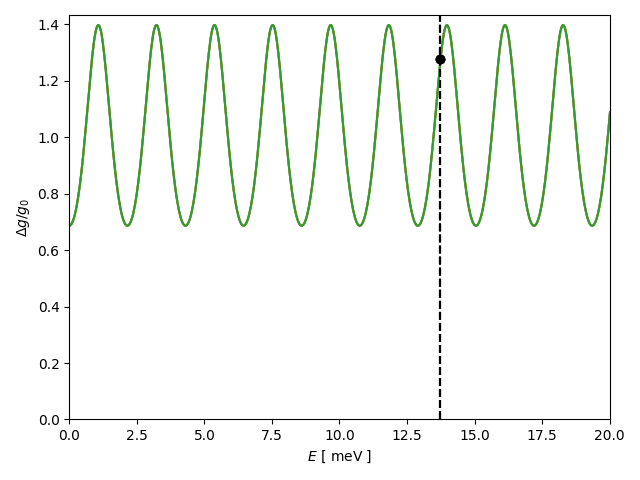

In [77]:
B = 2.0 # T
Evals = np.linspace(0.000,0.030,1001,endpoint=True) # eV

Ns = 100

wc = wcB(B,meff) # s-1
chi = chiBT(B,T,meff) # dimensionless
if EFmoves is True:
    EF = brentq(ExEf,0.5*EFk,1.5*EFk,args=(EFk,B,T,tau,tauq,geff,meff))

else:
    EF=EFk

if Piot is True:
    GammaG = 2.354*hbar/(2*tauq) # width for Gaussian LLs

if Raikh is True:
    maglen = np.sqrt(hbar/(q*B))
    RL = maglen*np.sqrt(2*q*Evals/(hbar*wc)) # Energy is already in eV
    GammaGsquared = kF/(2*np.pi**2*RL)*np.pi*hbar**3/(meff*tauq)
    GammaG = np.sqrt(GammaGsquared)
    #GammaG = hbar/(2*tauq)*np.sqrt(B) # width for Gaussian LLs, propto sqrt(B)

DgEF = 0.0

Dg = np.zeros_like(Evals)
Dg = Dg+DgIS(Evals,B,T,tau,tauq,geff,meff)
DgEF = DgIS(EF,B,T,tau,tauq,geff,meff)

neff = ns*(1+DgEF)
tauR = tau*ns/neff
sigmaXX = sigma0/(1+(wc*tauR)**2)
sigmaXY = q*dNdB(EF,B,T,tau,tauq,geff,meff)-wc*tauR*sigmaXX

#sigmaXX = nsm*(1+DgEF)*q*mum/(1+(mum*B)**2)
#sigmaXY = -(q**2*nsm/(meff*wc)*DgEF-wc*tau*sigmaXX)
rhoXX = sigmaXX/(sigmaXX**2+sigmaXY**2)
rhoXY = sigmaXY/(sigmaXX**2+sigmaXY**2)

#print(rhoXX,rhoXY)

if Lorentzian is True:
    plt.figure('DOS Lorentzian', layout='tight')

if Gaussian is True:
    if Piot is True:
        plt.figure('DOS Gaussian (Piot)', layout='tight')
        
    if Raikh is True:
        plt.figure('DOS Gaussian (Raikh)', layout='tight')
    
plt.xlabel('$E$ [ meV ]')
plt.xlim(0,20)
plt.ylabel('$\\Delta g / g_0$')
plt.plot(1e3*Evals,1+Dg)
plt.plot(1e3*EF,1+DgEF, 'o', color='black')
plt.axvline(x=1e3*EF, color='black', ls='--')
plt.ylim(bottom=0)
#plt.legend()
# plt.savefig('DOS.jpg', dpi=300)
plt.show()

In [78]:
Bmax = 2.00 # T
#Bstep = 0.05 #T
Bstep = 0.01 # T
Bmin = 0.00 # T
Bres = 1/Bstep # B points per T
Bvals = np.linspace(Bmin,Bmax,1+int((Bmax-Bmin)*Bres),endpoint=True)
sigma = np.zeros((len(Bvals),2))
rho = np.zeros((len(Bvals),2))

Tindex = 0
Tvals=[1.6,2.0,2.5,3.0,3.5,4.0,4.5]
sigmaT = np.zeros((len(Tvals),len(Bvals),2))
rhoT = np.zeros((len(Tvals),len(Bvals),2))
for T in Tvals:
    xxout='0.1xxC{:.1f}K.dat'.format(T) # filenames like 0.1xxC2.0K.dat
    xyout='0.1xyC{:.1f}K.dat'.format(T) # filenames like 0.1xxC2.0K.dat
    Bindex = 0
    for B in Bvals:
        if B!=0:
            if EFmoves is True:
                EF = brentq(ExEf,0.5*EFk,1.5*EFk,args=(EFk,B,T,tau,tauq,geff,meff))

            else:
                EF = EFk

            DgEF = 0.0
            DgEF = DgIS(EF,B,T,tau,tauq,geff,meff)

            neff = nsm*(1+DgEF)
            tauR = tau*nsm/neff
            sigmaXX = sigma0/(1+(wcB(B,meff)*tauR)**2)
            sigmaXY = -(q*dNdB(EF,B,T,tau,tauq,geff,meff)-wcB(B,meff)*tauR*sigmaXX)

            #sigmaXX = nsm*(1+DgEF)*q*mum/(1+(mum*B)**2)
            #sigmaXY = -(q**2*nsm/(meff*wc)*DgEF-wc*tau*sigmaXX)
        
        else:
            EF = EFk
            sigmaXX = nsm*q*mum
            sigmaXY = 0.0

        sigma[Bindex,:] = sigmaXX, sigmaXY
        rhoXX = sigmaXX/(sigmaXX**2+sigmaXY**2)
        rhoXY = sigmaXY/(sigmaXX**2+sigmaXY**2)
        rho[Bindex,:] = rhoXX, rhoXY
        #print("{:.2f}\t{:.4e}\t{:.4e}\t{:.4f}\t{:.4f}".format(B,sigmaXX,-sigmaXY,rhoXX,-rhoXY))
        #print("{:.2f}\t{:.4e}\t{:.4e}\t{:.4f}\t{:.4f}".format(Bvals[Bindex],sigma[Bindex,0],sigma[Bindex,1],rho[Bindex,0],rho[Bindex,1]))

        Bmeas=Bvals<B

        Bindex=Bindex+1

        sigmaT[Tindex,:] = sigma

    if savedata is True:
        print('saving to '+xxout+' and '+xyout)
        Tcol = T*np.ones((len(Bvals),))
        blank = np.zeros((len(Bvals),))
        # print(rho[:,0])
        colstack = np.column_stack((Tcol,blank,blank,rho[:,0]*1.3,blank,blank,blank,blank,blank,blank,blank,blank,blank,Bvals,blank,blank))
        np.savetxt(xxout, colstack, header='T1	T2	T3	R1	R2	R3	t1min	t2min	t3min	sequence	I1	I2	I3	B1	B2	B3')
        colstack = np.column_stack((Tcol,blank,blank,rho[:,1],blank,blank,blank,blank,blank,blank,blank,blank,blank,Bvals,blank,blank))
        np.savetxt(xyout, colstack, header='T1	T2	T3	R1	R2	R3	t1min	t2min	t3min	sequence	I1	I2	I3	B1	B2	B3')

    rhoT[Tindex,:] = rho
    Tindex=Tindex+1

C:\userkeil\AppData\Local\Temp\ipykernel_29176\1654596297.py:65: RuntimeWarning: overflow encountered in sinh
  toreturn=np.exp(-np.pi*s/(wc*tauq))*np.cos(2*np.pi*s*(E+0.5*geff*muB*B)/(hbar*wc/q)+s*np.pi)*s*chi/(np.sinh(s*chi)) # Lorentzian
C:\userkeil\AppData\Local\Temp\ipykernel_29176\1654596297.py:65: RuntimeWarning: overflow encountered in sinh
  toreturn=np.exp(-np.pi*s/(wc*tauq))*np.cos(2*np.pi*s*(E+0.5*geff*muB*B)/(hbar*wc/q)+s*np.pi)*s*chi/(np.sinh(s*chi)) # Lorentzian


saving to 0.1xxC1.6K.dat and 0.1xyC1.6K.dat
saving to 0.1xxC2.0K.dat and 0.1xyC2.0K.dat


C:\userkeil\AppData\Local\Temp\ipykernel_29176\1654596297.py:65: RuntimeWarning: overflow encountered in sinh
  toreturn=np.exp(-np.pi*s/(wc*tauq))*np.cos(2*np.pi*s*(E+0.5*geff*muB*B)/(hbar*wc/q)+s*np.pi)*s*chi/(np.sinh(s*chi)) # Lorentzian
C:\userkeil\AppData\Local\Temp\ipykernel_29176\1654596297.py:65: RuntimeWarning: overflow encountered in sinh
  toreturn=np.exp(-np.pi*s/(wc*tauq))*np.cos(2*np.pi*s*(E+0.5*geff*muB*B)/(hbar*wc/q)+s*np.pi)*s*chi/(np.sinh(s*chi)) # Lorentzian


saving to 0.1xxC2.5K.dat and 0.1xyC2.5K.dat
saving to 0.1xxC3.0K.dat and 0.1xyC3.0K.dat
saving to 0.1xxC3.5K.dat and 0.1xyC3.5K.dat
saving to 0.1xxC4.0K.dat and 0.1xyC4.0K.dat


C:\userkeil\AppData\Local\Temp\ipykernel_29176\1654596297.py:65: RuntimeWarning: overflow encountered in sinh
  toreturn=np.exp(-np.pi*s/(wc*tauq))*np.cos(2*np.pi*s*(E+0.5*geff*muB*B)/(hbar*wc/q)+s*np.pi)*s*chi/(np.sinh(s*chi)) # Lorentzian
C:\userkeil\AppData\Local\Temp\ipykernel_29176\1654596297.py:65: RuntimeWarning: overflow encountered in sinh
  toreturn=np.exp(-np.pi*s/(wc*tauq))*np.cos(2*np.pi*s*(E+0.5*geff*muB*B)/(hbar*wc/q)+s*np.pi)*s*chi/(np.sinh(s*chi)) # Lorentzian


saving to 0.1xxC4.5K.dat and 0.1xyC4.5K.dat


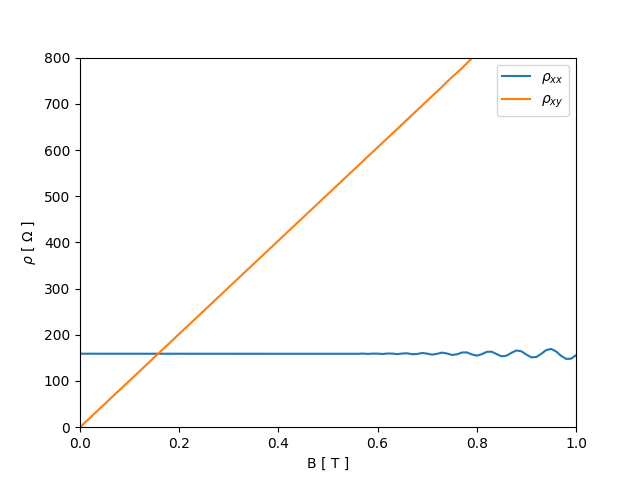

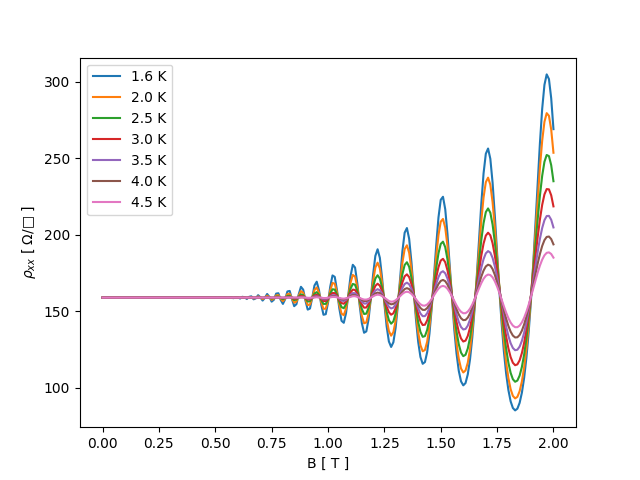

C:\userkeil\AppData\Local\Temp\ipykernel_29176\3751582898.py:53: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/Bvals,rhoT[Tindex,:,0], label='{} K'.format(T))


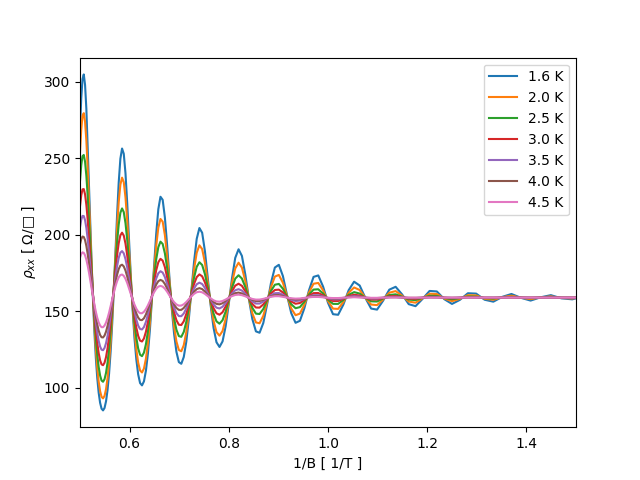

C:\userkeil\AppData\Local\Temp\ipykernel_29176\3751582898.py:65: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/Bvals,rhoT[Tindex,:,0], label='{} K'.format(T))


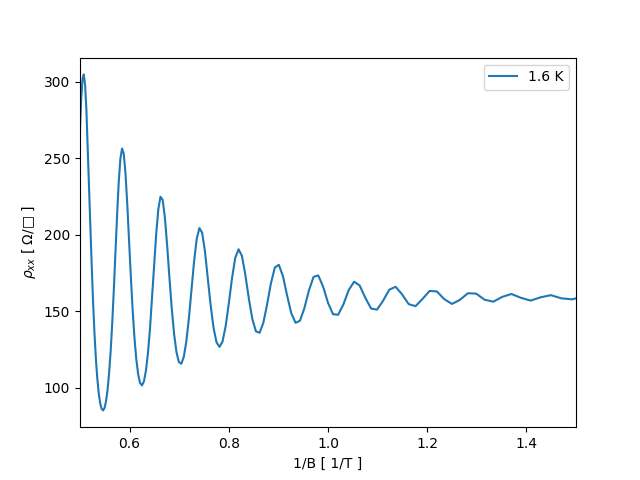

In [79]:
plt.close('all')
Tindex=0
plt.figure('Hall effect')
T = Tvals[Tindex]
plt.xlim(0,1)
plt.plot(Bvals,rhoT[Tindex,:,0], label='$\\rho_{xx}$')
plt.plot(Bvals,rhoT[Tindex,:,1], label='$\\rho_{xy}$')
plt.xlabel('B [ T ]')
plt.ylabel('$\\rho$ [ $\\Omega$ ]')
#plt.ylabel('$\\rho$ [ $\Omega$/$\u25a1$ ]')
plt.legend()
plt.ylim(bottom=0)
plt.ylim(top=800)
plt.show()


if False:
    fig,ax=plt.subplots()
    T = Tvals[Tindex]
    ax.set_xlim(0,0.5)
    ax.plot(Bvals,rhoT[Tindex,:,0], label='$\\rho_{xx}$')
    ax.set_xlabel('B [ T ]')
    ax.set_ylabel('$\\rho_{xx}$ [ $\\Omega$/$\u25a1$ ]')
    ax2=ax.twinx()
    ax2.plot(Bvals,rhoT[Tindex,:,1], label='$\\rho_{xy}$', color='orange')
    ax2.set_ylabel('$\\rho_{xy}$ [ $\\Omega$ ]')
    # fig.legend()
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax.set_ylim(bottom=0)
    ax.set_ylim(top=100)
    ax2.set_ylim(bottom=0)
    ax2.set_ylim(top=400)
    fig.tight_layout()
    # plt.savefig('Fig_2.1.jpg', dpi=300)

plt.figure('SdH simulation')
Tindex=0
for T in Tvals:
    plt.plot(Bvals,rhoT[Tindex,:,0], label='{} K'.format(T))
    # plt.plot(Bvals,rhoT[Tindex,:,1], label='{} K'.format(T))
    Tindex=Tindex+1
    
plt.xlabel('B [ T ]')
plt.ylabel('$\\rho_{xx}$ [ $\\Omega$/$\u25a1$ ]')
plt.legend()
plt.show()

plt.figure('SdH in 1/B (all T)')
Tindex=0
for T in Tvals:
    #plt.plot(1/Bvals,rhoT[Tindex,:,1], label='{} K'.format(T))
    plt.plot(1/Bvals,rhoT[Tindex,:,0], label='{} K'.format(T))
    Tindex=Tindex+1
    
plt.xlabel('1/B [ 1/T ]')
plt.ylabel('$\\rho_{xx}$ [ $\\Omega$/$\u25a1$ ]')
plt.xlim(left=0.5,right=1.5)
plt.legend()
plt.show()

plt.figure('SdH in 1/B')
Tindex=0
T=Tvals[Tindex]
plt.plot(1/Bvals,rhoT[Tindex,:,0], label='{} K'.format(T))
# plt.plot(1/Bvals,rhoT[Tindex,:,1], label='{} K'.format(T))
    
plt.xlabel('1/B [ 1/T ]')
plt.ylabel('$\\rho_{xx}$ [ $\\Omega$/$\u25a1$ ]')
plt.xlim(left=0.5,right=1.5)
plt.legend()
# plt.savefig('Fig_2.2.jpg', dpi=300)

plt.show()


Dingle ratio: 6.4822, intercept: 4.8070


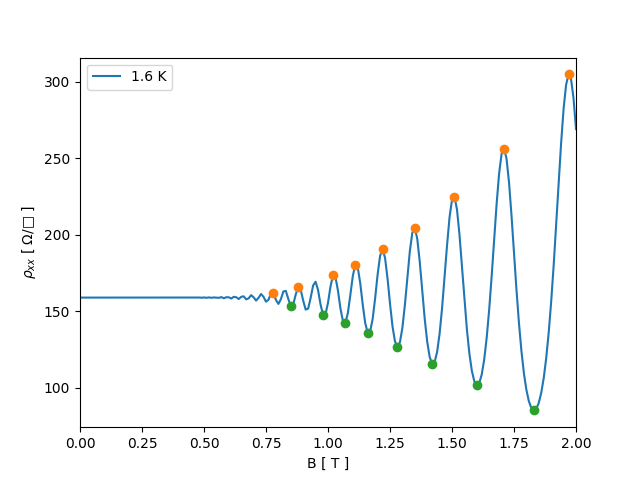

In [80]:
Blower = 0.75

Tindex=0
T = Tvals[Tindex]


indexp = peakutils.indexes(rhoT[Tindex,:,0], thres=0.3, min_dist=8)
indexn = peakutils.indexes(-rhoT[Tindex,:,0], thres=0.3, min_dist=8)

peaksp=np.array((Bvals[indexp],(rhoT[Tindex,indexp,0]-rho0)))
peaksn=np.array((Bvals[indexn],-(rhoT[Tindex,indexn,0]-rho0)))
peaksa=np.concatenate((peaksp,peaksn), axis=1)

#print(np.array((Bvals[indexp],(rhoT[Tindex,indexp,0]))))

#print(peaksp); print()
#print(peaksn); print()
#print(peaksa); print()

peaksorder=peaksa.argsort()[0]
peakss=peaksa[:,peaksorder]
#print(peakss)
#print()
Bpfilter = peaksp[0]>Blower
Bnfilter = peaksn[0]>Blower

plt.figure('Peak finding')
plt.xlabel('B [ T ]')
plt.ylabel('$\\rho_{xx}$ [ $\\Omega$/$\u25a1$ ]')
plt.plot(Bvals,rhoT[Tindex,:,0], label='{} K'.format(T))
plt.xlim(left=0.0,right=2.0)
plt.legend()
plt.plot(peaksp[0,Bpfilter],rho0+peaksp[1,Bpfilter],'o')
plt.plot(peaksn[0,Bnfilter],rho0-peaksn[1,Bnfilter],'o')

Bfilter = peakss[0]>Blower
peaksB=np.array((peakss[0,Bfilter],peakss[1,Bfilter]))
# print(peaksB)

dinglex=1/(1e-4*mu*peaksB[0])
dingley=np.log(np.sinh(chiBT(peaksB[0],T,meff))/chiBT(peaksB[0],T,meff)*peaksB[1]/rho0)

dinglefit=curve_fit(straightline,dinglex,dingley)
dingleratio=dinglefit[0][0]/-np.pi
dingleinter=np.exp(dinglefit[0][1])
print("Dingle ratio: {:.4f}, intercept: {:.4f}".format(dingleratio,dingleinter))

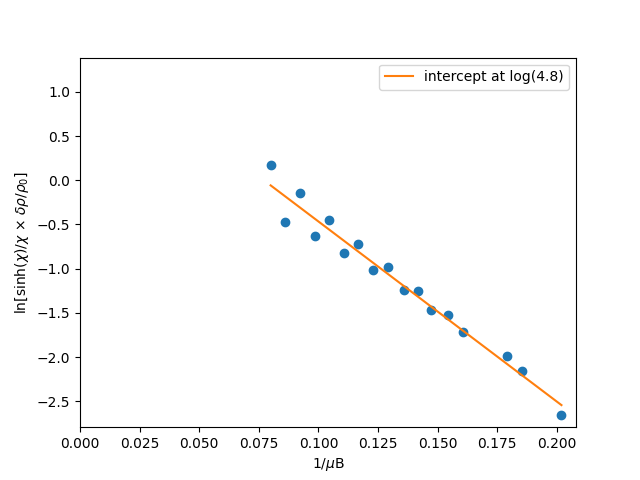

In [81]:
plt.figure('Dingle')
plt.plot(dinglex,dingley,'o')
#plt.plot(dinglex,np.log(4)-np.pi*dingleratio*dinglex, label='intercept at log(4)')
plt.plot(dinglex,np.log(dingleinter)-np.pi*dingleratio*dinglex, label='intercept at log({:.2})'.format(dingleinter))
plt.xlim(left=0.0)
plt.ylim(top=np.log(4.0))
plt.xlabel('1/$\\mu$B')
plt.ylabel('ln[sinh($\\chi$)/$\\chi$ × $\\delta \\rho$/$\\rho_0$]')
plt.legend()
plt.show()

In [82]:
print("actual tau_q: {:.4f} ps".format(1e12*tauq))
print("actual Dingle ratio: {:.2f}".format(alpha))
print("extracted Dingle ratio: {:.2f}".format(dingleratio))
print("extracted tau_q: {:.4f} ps".format(1e12*tau/dingleratio))

actual tau_q: 0.6480 ps
actual Dingle ratio: 6.00
extracted Dingle ratio: 6.48
extracted tau_q: 0.5998 ps


# Plotting all the way up to the QHE regime:

In [83]:
Bmax = 7.50 # T
Bstep = 0.005 # T
Bmin = 0.00 # T
Bres = 1/Bstep # B points per T
Bvals = np.linspace(Bmin,Bmax,1+int((Bmax-Bmin)*Bres),endpoint=True)
sigma = np.zeros((len(Bvals),2))
rho = np.zeros((len(Bvals),2))

# geff=gstar*0.5*(1+erf((B-Bon)/Bwidth))
gstar=10.0
Bon = 4.0
Bwidth = 2.5

Tindex = 0
Tvals=[1.6,]
sigmaT = np.zeros((len(Tvals),len(Bvals),2))
rhoT = np.zeros((len(Tvals),len(Bvals),2))
for T in Tvals:
    xxout='0.1xxC{:.1f}K.dat'.format(T) # filenames like 0.1xxC2.0K.dat
    xyout='0.1xyC{:.1f}K.dat'.format(T) # filenames like 0.1xxC2.0K.dat
    Bindex = 0
    for B in Bvals:
        if B!=0:
            geff=gstar*0.5*(1+erf((B-Bon)/Bwidth))
            if EFmoves is True:
                EF = brentq(ExEf,0.5*EFk,1.5*EFk,args=(EFk,B,T,tau,tauq,geff,meff))

            else:
                EF = EFk

            DgEF = 0.0
            DgEF = DgIS(EF,B,T,tau,tauq,geff,meff)

            neff = nsm*(1+DgEF)
            tauR = tau*nsm/neff
            sigmaXX = sigma0/(1+(wcB(B,meff)*tauR)**2)
            sigmaXY = -(q*dNdB(EF,B,T,tau,tauq,geff,meff)-wcB(B,meff)*tauR*sigmaXX)

            #sigmaXX = nsm*(1+DgEF)*q*mum/(1+(mum*B)**2)
            #sigmaXY = -(q**2*nsm/(meff*wc)*DgEF-wc*tau*sigmaXX)
        
        else:
            EF = EFk
            sigmaXX = nsm*q*mum
            sigmaXY = 0.0

        sigma[Bindex,:] = sigmaXX, sigmaXY
        rhoXX = sigmaXX/(sigmaXX**2+sigmaXY**2)
        rhoXY = sigmaXY/(sigmaXX**2+sigmaXY**2)
        rho[Bindex,:] = rhoXX, rhoXY
        #print("{:.2f}\t{:.4e}\t{:.4e}\t{:.4f}\t{:.4f}".format(B,sigmaXX,-sigmaXY,rhoXX,-rhoXY))
        #print("{:.2f}\t{:.4e}\t{:.4e}\t{:.4f}\t{:.4f}".format(Bvals[Bindex],sigma[Bindex,0],sigma[Bindex,1],rho[Bindex,0],rho[Bindex,1]))

        Bmeas=Bvals<B

        Bindex=Bindex+1

        sigmaT[Tindex,:] = sigma

    if savedata is True:
        print('saving to '+xxout+' and '+xyout)
        Tcol = T*np.ones((len(Bvals),))
        blank = np.zeros((len(Bvals),))
        # print(rho[:,0])
        colstack = np.column_stack((Tcol,blank,blank,rho[:,0]*1.3,blank,blank,blank,blank,blank,blank,blank,blank,blank,Bvals,blank,blank))
        np.savetxt(xxout, colstack, header='T1	T2	T3	R1	R2	R3	t1min	t2min	t3min	sequence	I1	I2	I3	B1	B2	B3')
        colstack = np.column_stack((Tcol,blank,blank,rho[:,1],blank,blank,blank,blank,blank,blank,blank,blank,blank,Bvals,blank,blank))
        np.savetxt(xyout, colstack, header='T1	T2	T3	R1	R2	R3	t1min	t2min	t3min	sequence	I1	I2	I3	B1	B2	B3')

    rhoT[Tindex,:] = rho
    Tindex=Tindex+1

C:\userkeil\AppData\Local\Temp\ipykernel_29176\1654596297.py:65: RuntimeWarning: overflow encountered in sinh
  toreturn=np.exp(-np.pi*s/(wc*tauq))*np.cos(2*np.pi*s*(E+0.5*geff*muB*B)/(hbar*wc/q)+s*np.pi)*s*chi/(np.sinh(s*chi)) # Lorentzian
C:\userkeil\AppData\Local\Temp\ipykernel_29176\1654596297.py:65: RuntimeWarning: overflow encountered in sinh
  toreturn=np.exp(-np.pi*s/(wc*tauq))*np.cos(2*np.pi*s*(E+0.5*geff*muB*B)/(hbar*wc/q)+s*np.pi)*s*chi/(np.sinh(s*chi)) # Lorentzian
C:\userkeil\AppData\Local\Temp\ipykernel_29176\1654596297.py:65: RuntimeWarning: overflow encountered in sinh
  toreturn=np.exp(-np.pi*s/(wc*tauq))*np.cos(2*np.pi*s*(E+0.5*geff*muB*B)/(hbar*wc/q)+s*np.pi)*s*chi/(np.sinh(s*chi)) # Lorentzian
C:\userkeil\AppData\Local\Temp\ipykernel_29176\1654596297.py:65: RuntimeWarning: overflow encountered in sinh
  toreturn=np.exp(-np.pi*s/(wc*tauq))*np.cos(2*np.pi*s*(E+0.5*geff*muB*B)/(hbar*wc/q)+s*np.pi)*s*chi/(np.sinh(s*chi)) # Lorentzian
C:\userkeil\AppData\Local\Temp\ipyke

saving to 0.1xxC1.6K.dat and 0.1xyC1.6K.dat


(0.0, 8697.946886319827)

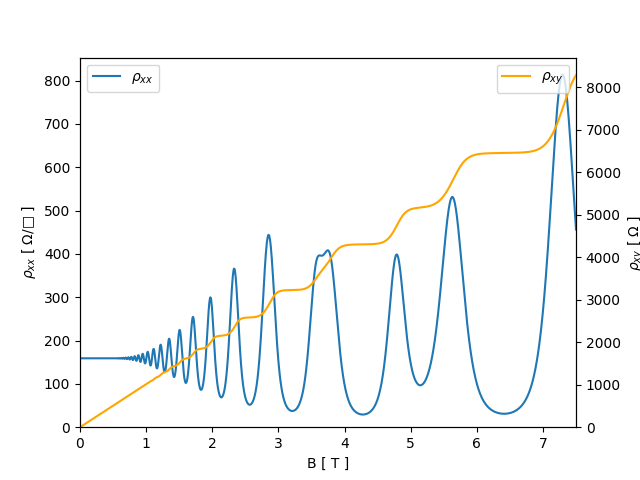

In [85]:

Tindex = 0
fig,ax=plt.subplots()
T = Tvals[Tindex]
ax.set_xlim(0,7.5)
ax.plot(Bvals,rhoT[Tindex,:,0], label='$\\rho_{xx}$')

ax.set_xlabel('B [ T ]')
ax.set_ylabel('$\\rho_{xx}$ [ $\\Omega$/$\u25a1$ ]')

ax2=ax.twinx()
ax2.plot(Bvals,rhoT[Tindex,:,1], label='$\\rho_{xy}$', color='orange')

ax2.set_ylabel('$\\rho_{xy}$ [ $\\Omega$ ]')
# fig.legend()


ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.set_ylim(bottom=0)


#ax.set_ylim(top=100)
ax2.set_ylim(bottom=0)

#ax2.set_ylim(top=400)
#fig.tight_layout()
